- mpg (Miles/(US) gallon): 연료 효율성을 나타내는 값. 주행 거리 당 갤런당 마일 수를 의미합니다.
- cyl (Number of cylinders): 자동차 엔진의 실린더 개수를 나타냅니다.
- disp (Displacement): 엔진의 배기량을 나타내는 값입니다.
- hp (Gross horsepower): 자동차의 총 마력을 나타냅니다.
- drat (Rear axle ratio): 자동차의 후륜축 비율을 나타내는 값입니다.
- wt (Weight): 자동차의 무게를 나타내는 값입니다.
- qsec (1/4 mile time): 자동차가 1/4 마일을 달리는 데 걸리는 시간을 나타내는 값입니다.
- vs (Engine (0 = V-shaped, 1 = straight)): 엔진 형태를 나타내는 변수로, V형 엔진인지 직선 엔진인지를 나타냅니다.
- am (Transmission (0 = automatic, 1 = manual)): 변속기의 종류를 나타내는 변수로, 자동변속기인지 수동변속기인지를 나타냅니다.
- gear (Number of forward gears): 전진 기어의 개수를 나타냅니다.
- carb (Number of carburetors): 자동차에 장착된 캐브레이터(유화기)의 개수를 나타냅니다.
이러한 열들은 자동차의 성능, 엔진 특성, 변속기 종류 등에 대한 정보

In [ ]:
from google.colab import files
# file 업로드
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [2]:
import pandas as pd
# data 불러오기
file_path='mtcars.csv'
df=pd.read_csv(file_path,index_col=0)
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'mtcars.csv'

In [4]:
import pandas as pd
file_path = '/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/mtcars.csv'
df = pd.read_csv(file_path,index_col=0)
print(df.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


- 모든 entries에서 결측치는 없음.
- 32개의 모수라서 통계 분석에는 한계가 있음.
- 모든 Parameter들이 숫자형 data라 correation이나 분석에는 문제가 없음
- 우선 parameter 간 correlation matrix를 살펴 봄

In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df_cor=df.corr()
df_sorted=df_cor.abs().sort_values(by='mpg', ascending=False)
print(df_sorted)
df_sorted=df_cor.sort_values(by='mpg', ascending=False)
df_sorted

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000  0.852162  0.847551  0.776168  0.681172  0.867659  0.418684   
wt    0.867659  0.782496  0.887980  0.658748  0.712441  1.000000  0.174716   
cyl   0.852162  1.000000  0.902033  0.832447  0.699938  0.782496  0.591242   
disp  0.847551  0.902033  1.000000  0.790949  0.710214  0.887980  0.433698   
hp    0.776168  0.832447  0.790949  1.000000  0.448759  0.658748  0.708223   
drat  0.681172  0.699938  0.710214  0.448759  1.000000  0.712441  0.091205   
vs    0.664039  0.810812  0.710416  0.723097  0.440278  0.554916  0.744535   
am    0.599832  0.522607  0.591227  0.243204  0.712711  0.692495  0.229861   
carb  0.550925  0.526988  0.394977  0.749812  0.090790  0.427606  0.656249   
gear  0.480285  0.492687  0.555569  0.125704  0.699610  0.583287  0.212682   
qsec  0.418684  0.591242  0.433698  0.708223  0.091205  0.174716  1.000000   

            vs        am      gear      carb  
mpg   0.664039  

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
carb,-0.550925,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988


## Correlation
 - MPG (miles per gallon)에 가장 sensitivity가 높은 parameter:
  - wt, cyl, disp, hp, drat, vs, am, carb, gear, qsec 순

## Normalization
 - Norm이 필요한 params: wt, cyl, disp, hp, drat, carb, gear, qsec
 - Norm이 필요 없는 params: vs, am

## Outlier 가 필요한 params: 표본 모수가 너무 작아 Outlier에 적합 X


## Parameter 선정
 - Correlation Coeff.가 0.6 미만 삭제 ==> drop  am, carb, gear, qsec
 - MPG에 strong correlation을 가지지만 다른 독립변수와 nearly 1:1 종속되어 있는 params: cyl vs. disp. ==>  상대적으로 corr이 높은 cyl 선택

SelectedParams=['mpg','cyl','hp','drat','wt','vs']  

## 파생 변수 발굴
 - Power to weight ratio: (hp/wt)
 - 엔진 크기 대비 실린더 수: (cyl/disp)


## 최종 parameters:
 - Norm 필요: 'mpg','cyl','hp','drat','wt','ppw', 'cyl/disp'
 - Norm 불필요: 'vs'

In [ ]:
#### 강사님 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)

<Axes: >

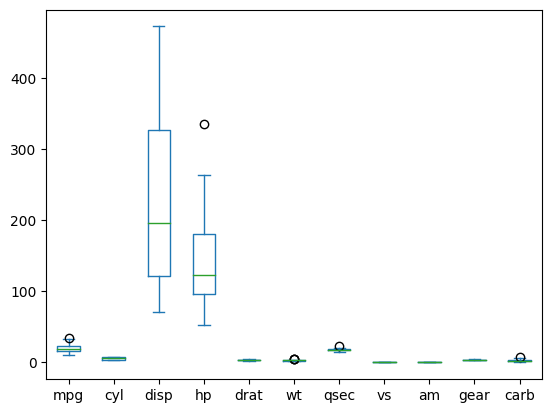

In [ ]:
df.plot.box()

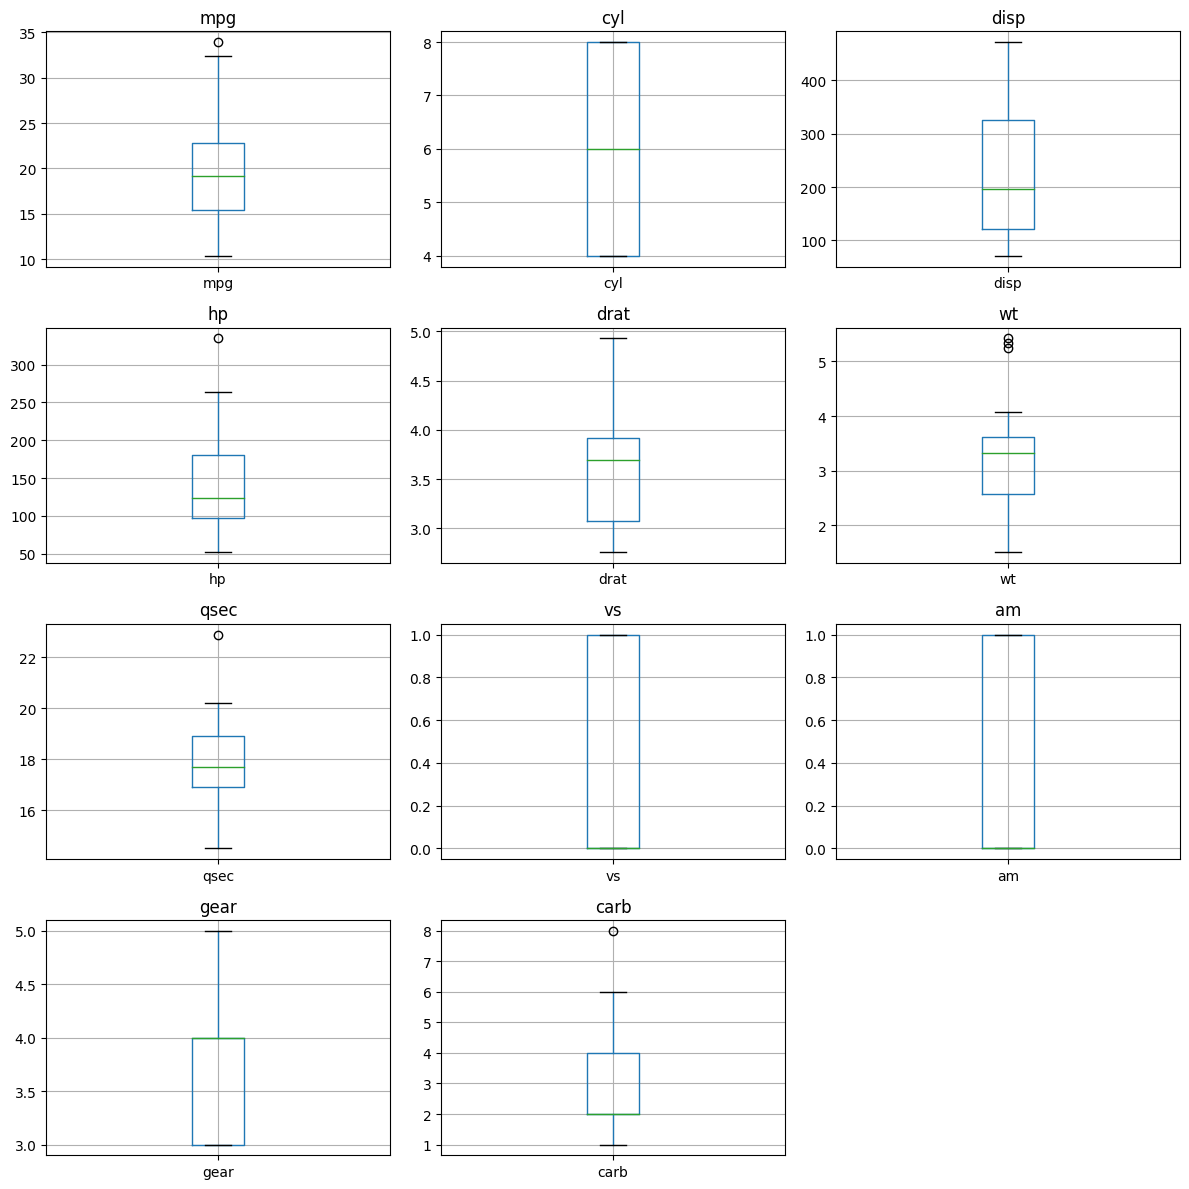

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))

for i, column in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  df.boxplot(column=column)
  plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
PV=df.pivot_table(index='cyl', values='hp', columns='gear', aggfunc='mean', fill_value=0)
PV

gear,3,4,5
cyl,,,
4,97.000000,76.0,102.0
6,107.500000,116.5,175.0
8,194.166667,0.0,299.5


In [ ]:
df_cor=df.corr()

target_variable='mpg'
correlation_threshold=0.5
print(df_cor[target_variable])
print(df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold])
corr_features=df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold].index.tolist()

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64
mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
vs      0.664039
am      0.599832
carb   -0.550925
Name: mpg, dtype: float64


In [ ]:
print(f"{target_variable}: {corr_features}")

mpg: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']


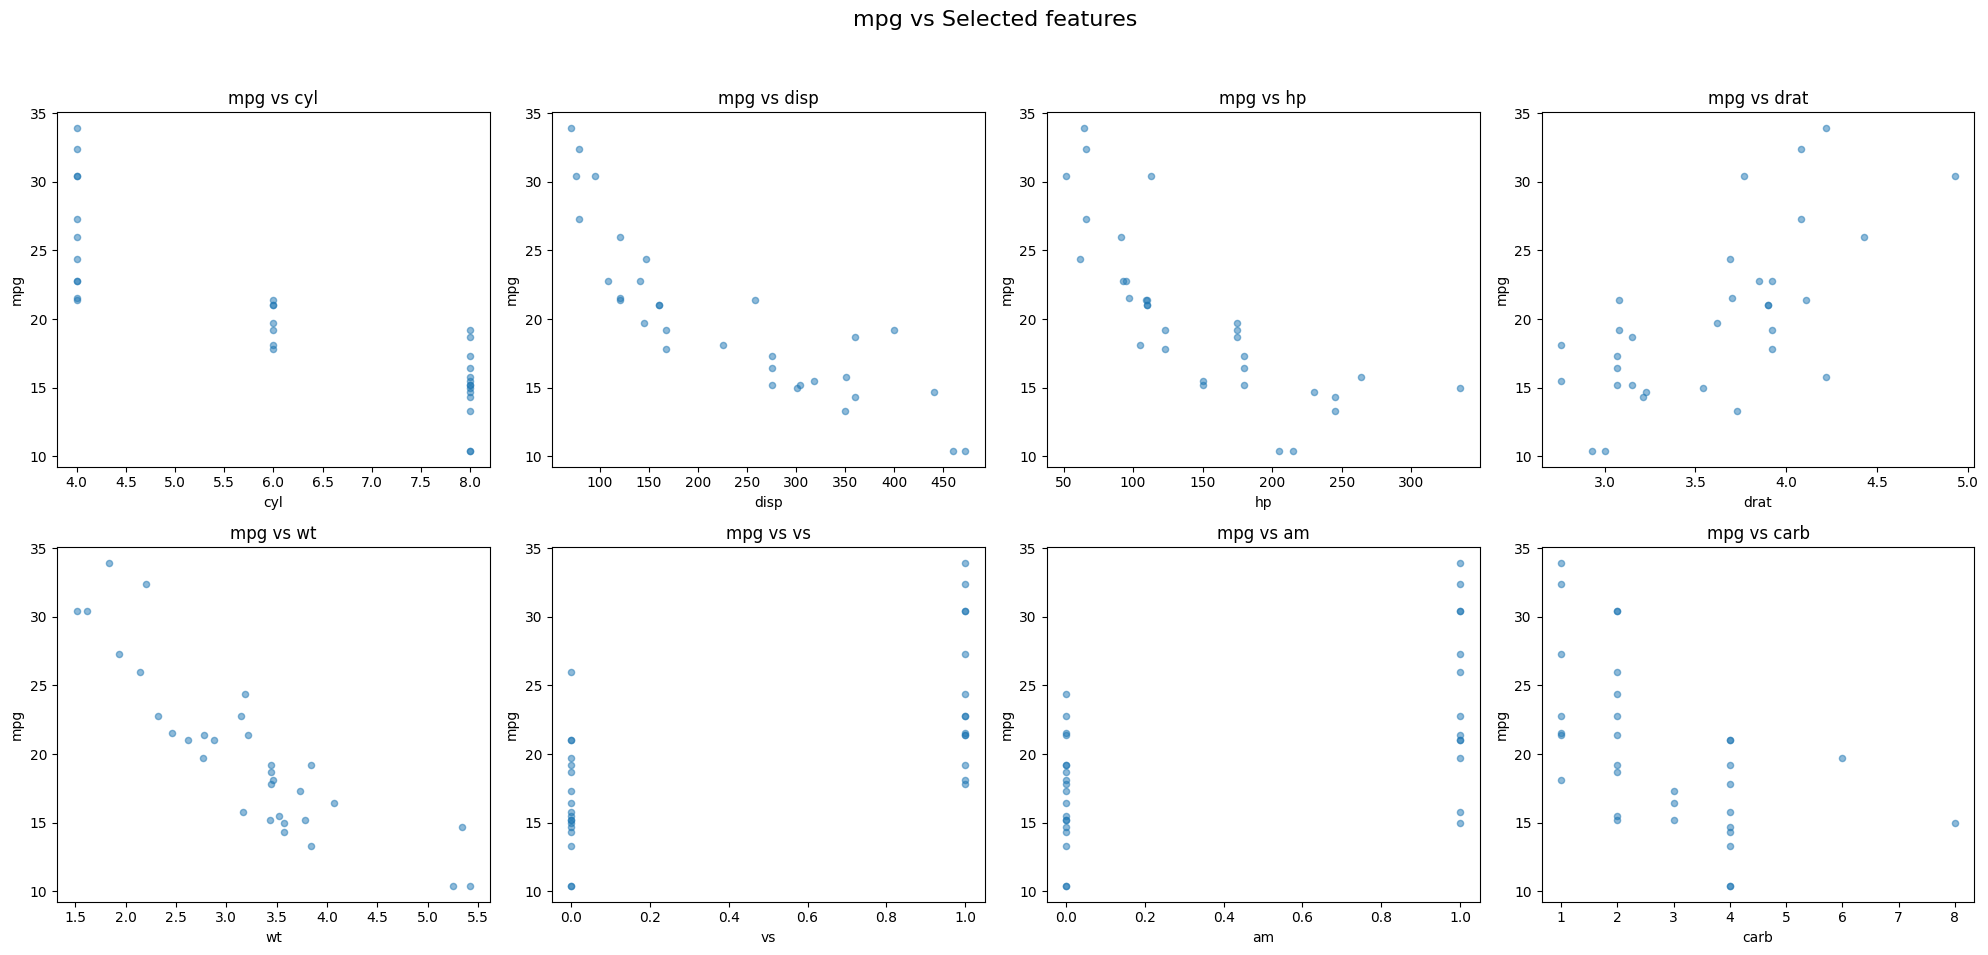

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

columns=['cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target='mpg'
fig, axes=plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, col in enumerate(columns):
  row,col_idx = divmod(i,4)
  df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")

fig.suptitle(f'{target} vs Selected features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                    mpg   disp   hp  drat     wt
Mazda RX4          21.0  160.0  110  3.90  2.620
Mazda RX4 Wag      21.0  160.0  110  3.90  2.875
Datsun 710         22.8  108.0   93  3.85  2.320
Hornet 4 Drive     21.4  258.0  110  3.08  3.215
Hornet Sportabout  18.7  360.0  175  3.15  3.440
       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7


<Figure size 1200x1200 with 0 Axes>

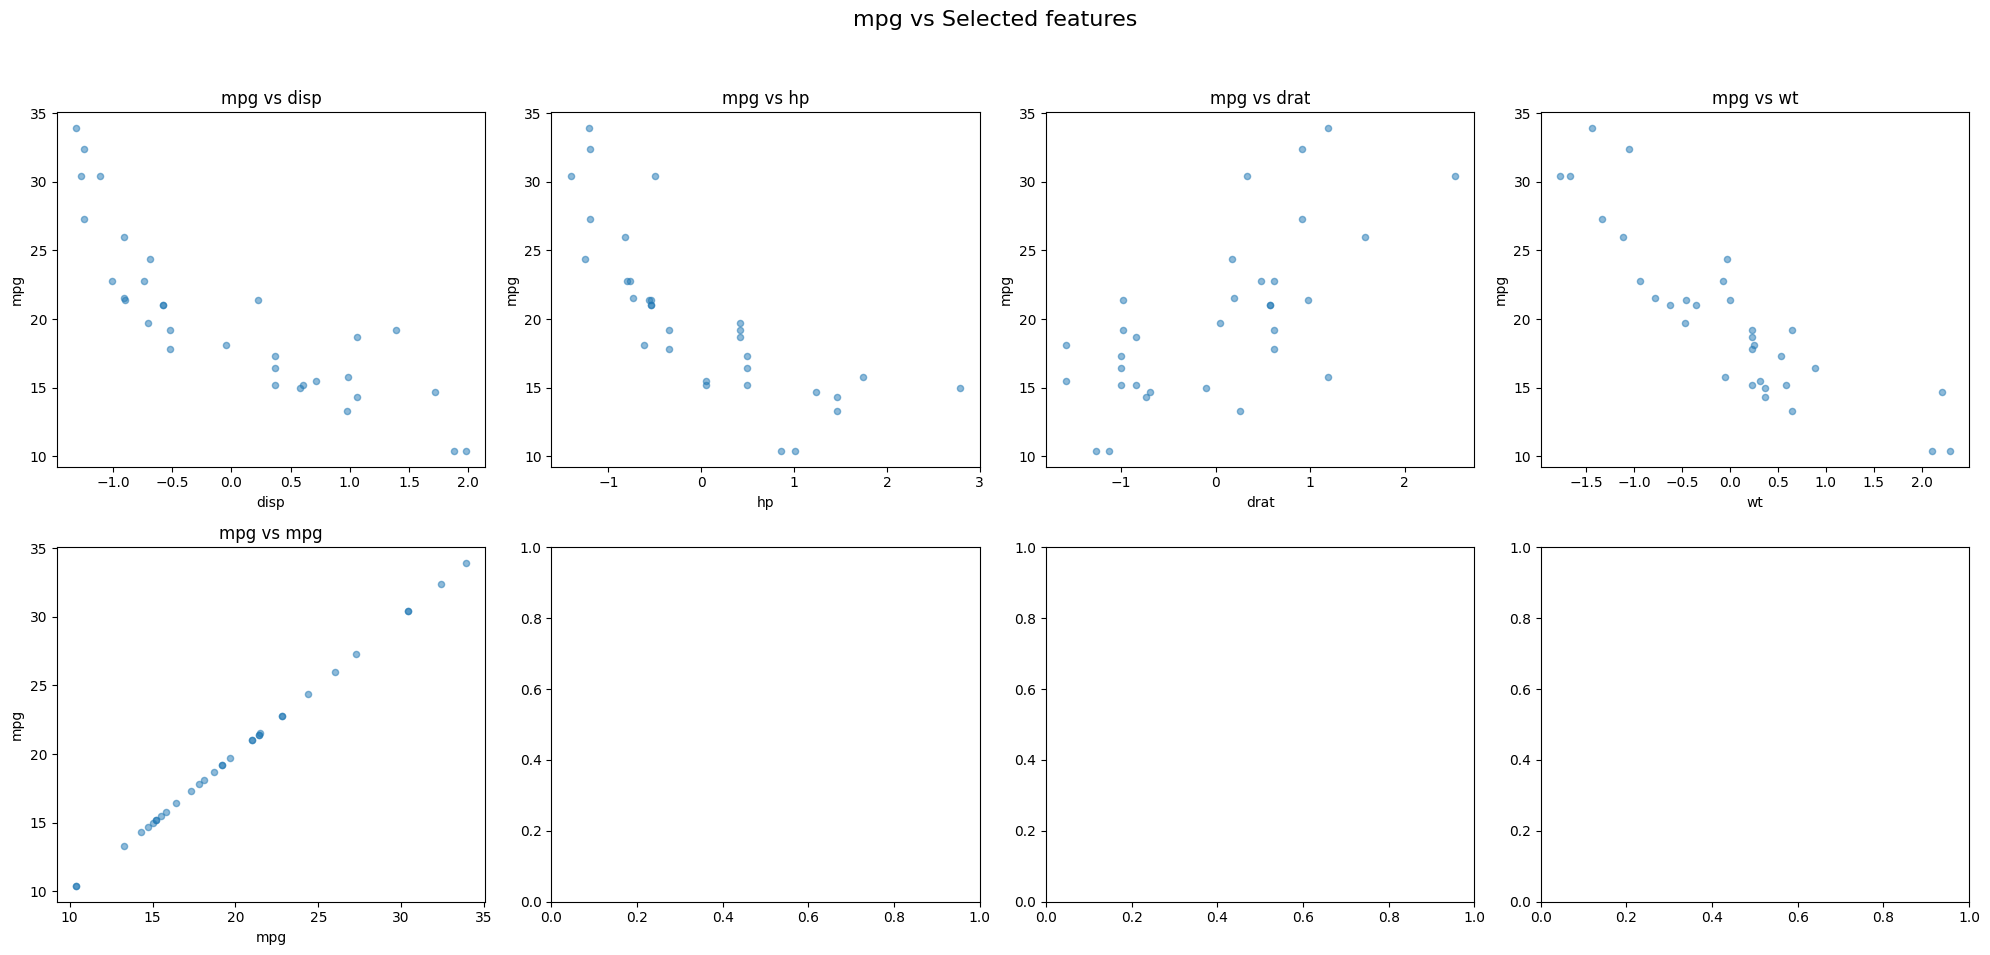

In [7]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(scaled_df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=scaled_df.columns
target='mpg'
nocols=4
fig, axes=plt.subplots(nrows=2, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  scaled_df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 8.99
Root Mean Squared Error: 3.0
R-squared: 0.78
